In [2]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
filename = 'disco.00000.wav'
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, units='samples')

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timest
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 117.45 beats per minute


/tmp/ipykernel_3703/3265285447.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),


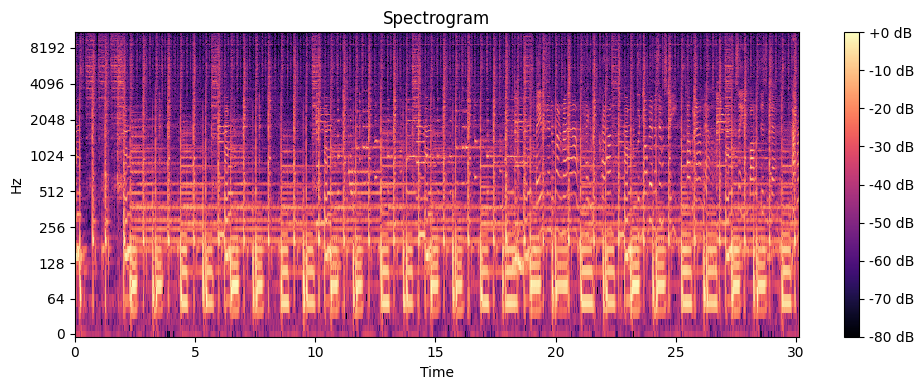

In [11]:
import numpy as np
# Create spectrogram from audio sample
spectrogram = librosa.stft(y)

# Visualize spectrogram
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                         y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


# Create wave file back from spectrogram
reconstructed_audio = librosa.istft(spectrogram)

# Save the reconstructed audio as a wave file using soundfile
import soundfile as sf
sf.write('reconstructed_audio.wav', reconstructed_audio, sr)


In [12]:
print(len(y))
print(beat_frames)

664180
[  5120  16896  28672  39936  51712  63488  74752  86016  97280 109568
 120832 132608 143872 155136 166400 178176 189952 201216 212992 224256
 235520 247296 258560 270336 281600 292864 304640 315904 327168 338944
 350208 361472 372736 384512 395776 407040 418816 430080 441344 453120
 464896 476672 487936 499200 510976 522240 533504 545280 557056 568832
 580608 591872 603648 614912 626176 637952]


In [13]:
slices = list()
for idx, frame in enumerate(beat_frames):
    if idx < len(beat_frames) - 1:
        slices.append(y[frame:frame+beat_frames[idx+1]])


In [14]:
# Create spectrogram from audio sample
spectrogram = librosa.stft(slices[1])

# Create wave file back from spectrogram
reconstructed_audio = librosa.istft(spectrogram)

# Save the reconstructed audio as a wave file using soundfile
sf.write('reconstructed_audio_50.wav', reconstructed_audio, sr)